In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd /content/drive/MyDrive/AnomalyDetection/
!ls

/content/drive/MyDrive/AnomalyDetection
 data		     EDA.ipynb	 'Main ipynb.ipynb'   output
 DataLoading	     loglizer	  Main.py.ipynb       test_metrics.csv
 DataPreprocessing   LogParsing   Models	      Utility


In [14]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Sep  6 09:05:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
# Install Required Packages
!pip install transformers
!pip install sentencepiece

In [16]:
#Setting the Path
from DataPreprocessing.Processing import *
from DataLoading.DataLoader import *
import os
import gc
if __name__ == "__main__":

    print("**************Data Loading and Parameter Setting*****************\n")

    current_directory = os.getcwd()
    data_dir = current_directory + "/data" # Currengt Data Directory
    output_dir = current_directory + "/output" # Output Directory
    log_file = "BGL.log" # Log File
    print(data_dir + "\n" + output_dir)
    dataobj = DataLoader(log_file) # Creating the object of DataLoader Class



**************Data Loading and Parameter Setting*****************

/content/drive/MyDrive/AnomalyDetection/data
/content/drive/MyDrive/AnomalyDetection/output


In [17]:
## Return Processed Output Structured and template files after processing Drain Algorithm
print("**************Return Processed Output Structured and template files after processing Drain Algorithm*****************\n")
dataobj.log_parser(data_dir, output_dir, log_file) # Creating structured and template file by using Drain Algorithm

**************Return Processed Output Structured and template files after processing Drain Algorithm*****************



In [18]:
# Training and Testing Data Split
from Utility.Train_Test_Data import *
import os
import gc
from sklearn.utils import shuffle
import numpy as np
current_directory = os.getcwd()
print(current_directory)

x_train,y_train,x_test,y_test =  get_train_test_data(current_directory)

/content/drive/MyDrive/AnomalyDetection
**************Data Loading and Parameter Setting*****************

/content/drive/MyDrive/AnomalyDetection/data
/content/drive/MyDrive/AnomalyDetection/output
**************Return Processed Output Structured and template files after processing Drain Algorithm*****************


    LineId Label          Id        Date                Code1  \
0       1     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   
1       2     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   
2       3     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   
3       4     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   
4       5     -  1117838570  2005.06.03  R02-M1-N0-C:J12-U11   

                         Time                Code2 Component1 Component2  \
0  2005-06-03-15.42.50.363779  R02-M1-N0-C:J12-U11        RAS     KERNEL   
1  2005-06-03-15.42.50.527847  R02-M1-N0-C:J12-U11        RAS     KERNEL   
2  2005-06-03-15.42.50.675872  R02-M1-N0-C:J12-U11        RAS     K

/content/drive/MyDrive/AnomalyDetection/DataPreprocessing/Processing.py:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_normal = np.array(train_normal).reshape(-1,1)
/content/drive/MyDrive/AnomalyDetection/DataPreprocessing/Processing.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_normal = np.array(test_normal).reshape(-1,1)



Loading Abnormal Data

Train & Test Directory /content/drive/MyDrive/AnomalyDetection/output


/content/drive/MyDrive/AnomalyDetection/DataPreprocessing/Processing.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_abnormal = np.array(train_abnormal).reshape(-1,1)
/content/drive/MyDrive/AnomalyDetection/DataPreprocessing/Processing.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_abnormal = np.array(test_abnormal).reshape(-1,1)



 Consolidate Normal and Abnormal logs - Training set : x_train and y_train

train Normal and Abnormal dataset
x_train size : 22388,y_train size :22388
Convert EventidTonNumber Training data
Total logkey(exclude 0:UNK) 1325

 Consolidate Normal and Abnormal logs - Test set : x_test and y_test

test Normal and Abnormal dataset
x_test size : 14927,y_test size :14927
Convert EventidTonNumber Test data
Total logkey(exclude 0:UNK) 1325
[4, 6, 7, 5] 0.0
[1, 8] 0.0
Length Validation assertion successful


In [19]:
# Model Development

In [20]:
# Loading Required Packages
import argparse
import numpy as np
import pandas as pd
import random
from importlib import reload
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.utils import shuffle
from loglizer import dataloader, preprocessing
from sklearn.metrics import accuracy_score
from loglizer.utils import metrics
from loglizer.models import PCA, IsolationForest, OneClassSVM, LogClustering
# Transformer Required Packages
import torch
import torch.nn as nn
import numpy as np
from transformers import BertModel, BertTokenizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_recall_fscore_support
import torch.optim as optim
# DistillBert Algorithm
from transformers import DistilBertModel, DistilBertTokenizer
# Load pre-trained RoBERTa model and tokenizer
from transformers import RobertaModel, RobertaTokenizer
from transformers import AlbertModel, AlbertTokenizer
from transformers import XLNetModel, XLNetTokenizer

In [21]:
# Base Line Models

In [22]:
# Feature Extraction
import warnings
warnings.filterwarnings('ignore')
feature_extractor = preprocessing.FeatureExtractor()
x_train = feature_extractor.fit_transform(x_train)
x_test = feature_extractor.transform(x_test)

====== Transformed train data summary ======
Train data shape: 22388-by-1241

====== Transformed test data summary ======
Test data shape: 14927-by-1241



In [23]:
x_train[0],x_train.shape

(array([127.,   0.,   0., ...,   0.,   0.,   0.]), (22388, 1241))

In [24]:
# PCA Model
%time
test_metrics = []
print("="*20 + " Model: PCA " + "="*20)
for th in np.arange(1):
    print("theshold", th)
    pca_model = PCA(n_components=0.8, threshold=1, c_alpha = 1.9600)
    pca_model.fit(x_train)
    print('Train validation:')
    precision, recall, f1 = pca_model.evaluate(x_train, y_train)
    print('Test validation:')
    precision, recall, f1 = pca_model.evaluate(x_test, y_test)
    y_pred = pca_model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Accuracy Score ",accuracy)
    test_metrics.append(("PCA",accuracy, precision, recall, f1))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
==================== Model: PCA ====================
theshold 0
====== Model summary ======
n_components: 5
Project matrix shape: 1241-by-1241
SPE threshold: 1

Train validation:
====== Evaluation summary ======
Confusion Matrix: TP: 1778, FP: 17881, TN: 2697, FN: 32
Precision: 9.044%, recall: 98.232%, F1-measure: 16.563%

Test validation:
====== Evaluation summary ======
Confusion Matrix: TP: 1194, FP: 11868, TN: 1851, FN: 14
Precision: 9.141%, recall: 98.841%, F1-measure: 16.734%

Accuracy Score  0.20399276478863804


In [ ]:
# Isolation Forest

%%time
print("="*20 + " Model: IsolationForest " + "="*20)
isolation_forest_model = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=19)
isolation_forest_model.fit(x_train)
print('Train validation:')
precision, recall, f1 = isolation_forest_model.evaluate(x_train, y_train)
print('Test validation:')
precision, recall, f1 = isolation_forest_model.evaluate(x_test, y_test)
y_pred = isolation_forest_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score ",accuracy)
test_metrics.append(("Isolation Forest",accuracy, precision, recall, f1))

==================== Model: IsolationForest ====================
====== Model summary ======
Train validation:
====== Evaluation summary ======
Confusion Matrix: TP: 276, FP: 0, TN: 20578, FN: 1534
Precision: 100.000, recall: 15.249, F1-measure: 26.462

Test validation:
====== Evaluation summary ======
Confusion Matrix: TP: 170, FP: 0, TN: 13719, FN: 1038
Precision: 100.000, recall: 14.073, F1-measure: 24.673

Accuracy Score  0.9304615796878141
CPU times: user 17.9 s, sys: 9.21 s, total: 27.1 s
Wall time: 26.9 s


In [ ]:
# one class SVM
%%time
print("="*20 + " Model: one class SVM " + "="*20)
OneClassSVM_model = OneClassSVM(kernel='rbf')
OneClassSVM_model.fit(x_train, y_train)

print('Train validation:')
precision, recall, f1 = OneClassSVM_model.evaluate(x_train, y_train)
print('Test validation:')
precision, recall, f1 = OneClassSVM_model.evaluate(x_test, y_test)
y_pred = OneClassSVM_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score ",accuracy)
test_metrics.append(("OneClassSVM",accuracy, precision, recall, f1))

==================== Model: one class SVM ====================
====== Model summary ======
Train validation:
====== Evaluation summary ======
Confusion Matrix: TP: 236, FP: 20578, TN: 0, FN: 1574
Precision: 1.134, recall: 13.039, F1-measure: 2.086

Test validation:
====== Evaluation summary ======
Confusion Matrix: TP: 144, FP: 13719, TN: 0, FN: 1064
Precision: 1.039, recall: 11.921, F1-measure: 1.911

Accuracy Score  0.009646948482615395
CPU times: user 22min 10s, sys: 1.15 s, total: 22min 11s
Wall time: 22min 5s


In [ ]:
# Log Clustering
%time
print("="*20 + " Model: LogClustering " + "="*20)
max_dist = 0.3  # the threshold to stop the clustering process
anomaly_threshold = 0.3  # the threshold for anomaly detection
LogClustering_model = LogClustering(max_dist=max_dist, anomaly_threshold=anomaly_threshold)
LogClustering_model.fit(x_train[y_train == 0, :])  # Use only normal samples for training
print('Train validation:')
precision, recall, f1 = LogClustering_model.evaluate(x_train, y_train)
print('Test validation:')
precision, recall, f1 = LogClustering_model.evaluate(x_test, y_test)
y_pred = LogClustering_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score ",accuracy)
test_metrics.append(("LogClustering",accuracy, precision, recall, f1))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
==================== Model: LogClustering ====================
====== Model summary ======
Starting offline clustering...
Processed 1000 instances.
Found 93 clusters offline.

Starting online clustering...
Processed 2000 instances.
Processed 4000 instances.
Processed 6000 instances.
Processed 8000 instances.
Processed 10000 instances.
Processed 12000 instances.
Processed 14000 instances.
Processed 16000 instances.
Processed 18000 instances.
Processed 20000 instances.
Processed 20578 instances.
Found 180 clusters online.

Train validation:
====== Evaluation summary ======
Confusion Matrix: TP: 1180, FP: 0, TN: 20578, FN: 630
Precision: 100.000, recall: 65.193, F1-measure: 78.930

Test validation:
====== Evaluation summary ======
Confusion Matrix: TP: 798, FP: 29, TN: 13690, FN: 410
Precision: 96.493, recall: 66.060, F1-measure: 78.427

Accuracy Score  0.9705902056675823


In [ ]:
test_metrics

[('PCA', 0.20399276478863804, 9.141, 98.8411, 16.7344),
 ('Isolation Forest', 0.9304615796878141, 100.0, 14.0728, 24.6734),
 ('OneClassSVM', 0.009646948482615395, 1.0387, 11.9205, 1.911),
 ('LogClustering', 0.9705902056675823, 96.4933, 66.0596, 78.4275)]

In [ ]:
# Create a pandas DataFrame
df_metrics = pd.DataFrame(test_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the DataFrame
print(df_metrics)

# Save the DataFrame as a CSV file
csv_filename = 'test_metrics.csv'
df_metrics.to_csv(csv_filename, index=False)
print(f"DataFrame saved as {csv_filename}")

              Model  Accuracy  Precision   Recall  F1 Score
0               PCA  0.203993     9.1410  98.8411   16.7344
1  Isolation Forest  0.930462   100.0000  14.0728   24.6734
2       OneClassSVM  0.009647     1.0387  11.9205    1.9110
3     LogClustering  0.970590    96.4933  66.0596   78.4275
DataFrame saved as test_metrics.csv


In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
csv_filename = 'test_metrics.csv'
df = pd.read_csv(csv_filename)

# Convert the DataFrame to a list of tuples
test_metrics = df.to_records(index=False)

# Display the list
print(test_metrics)

# Convert recarray to list of tuples
test_metrics = [tuple(record) for record in test_metrics]

# Print the list of tuples
print(test_metrics)

[('PCA', 0.20399276,   9.141 , 98.8411, 16.7344)
 ('Isolation Forest', 0.93046158, 100.    , 14.0728, 24.6734)
 ('OneClassSVM', 0.00964695,   1.0387, 11.9205,  1.911 )
 ('LogClustering', 0.97059021,  96.4933, 66.0596, 78.4275)]
[('PCA', 0.203992764788638, 9.141, 98.8411, 16.7344), ('Isolation Forest', 0.930461579687814, 100.0, 14.0728, 24.6734), ('OneClassSVM', 0.0096469484826153, 1.0387, 11.9205, 1.911), ('LogClustering', 0.9705902056675824, 96.4933, 66.0596, 78.4275)]


In [ ]:
%run /content/drive/MyDrive/AnomalyDetection/Models/Transformers_input.py

In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
#Transformer Models

# Loading Transformer Model class

from Models.Model_class import *
from Models.Transformers_input import *
from Models.Model_Training import *
from Models.Model_pickle import *
from Models.Model_Test_Batch import *

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# Determine the maximum sequence length
max_seq_length = max(len(seq) for seq in x_train)
print("max_seq_length :",max_seq_length)

max_seq_length : 1241


In [ ]:
#Bert Model
# Load pre-trained BERT model and tokenizer
bert_model_name = 'bert-base-uncased'
bert_model = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

# Get Input Id List and Attention Mask List
input_ids_list,attention_mask_list = get_input_data_and_attention_mask(x_train,tokenizer,device)
input_ids = torch.cat(input_ids_list, dim=0).to(device)
attention_mask = torch.cat(attention_mask_list, dim=0).to(device)

# Convert y_train to a tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Move to GPU

# Create DataLoader for training
batch_size = 16
dataset = TensorDataset(input_ids, attention_mask, y_train_tensor)
Data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the classification model
num_labels = 2
bert_base_model = ClassificationBERTModel(bert_model, num_labels=num_labels).to('cuda')  # Move to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(bert_base_model.parameters(), lr=1e-5)

# Train the Model
num_epochs = 5
bert_base_model = Model_Training(num_epochs, Data_loader, bert_base_model,optimizer,criterion)

# Create Model Pickle File
Model_pickle(bert_base_model,"bert_base_model")

# Evaluation on the test set
bert_base_model.eval()

# Setting Max Seq Length to 512
max_seq_length = 512

metrics = Model_Test_Batch_Iteration(x_test,y_test,100, bert_base_model,tokenizer,max_seq_length)

# Calculate average metrics over all batches
avg_accuracy = round(sum(accuracy for accuracy, _, _, _ in metrics) / len(metrics),2)
avg_precision = round(sum(precision for _, precision, _, _ in metrics) / len(metrics),2)
avg_recall = round(sum(recall for _, _, recall, _ in metrics) / len(metrics),2)
avg_f1 = round(sum(f1 for _, _, _, f1 in metrics) / len(metrics),2)

test_metrics.append(("bert_base_model",avg_accuracy, avg_precision, avg_recall, avg_f1))

print(f"Test Average Accuracy: {avg_accuracy:.4f}")
print(f"Test Average Precision: {avg_precision:.4f}")
print(f"Test Average Recall: {avg_recall:.4f}")
print(f"Test Average F1-Score: {avg_f1:.4f}")

Test Average Accuracy: 0.9800
Test Average Precision: 0.9900
Test Average Recall: 0.8000
Test Average F1-Score: 0.8800


In [ ]:
#Tuned Bert Model
# Load pre-trained BERT model and tokenizer
bert_model_name = 'bert-base-uncased'
bert_model = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

# Get Input Id List and Attention Mask List
input_ids_list,attention_mask_list = get_input_data_and_attention_mask(x_train,tokenizer,device)
input_ids = torch.cat(input_ids_list, dim=0).to(device)
attention_mask = torch.cat(attention_mask_list, dim=0).to(device)

# Convert y_train to a tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Move to GPU

# Create DataLoader for training
batch_size = 16
dataset = TensorDataset(input_ids, attention_mask, y_train_tensor)
Data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the classification model
num_labels = 2
bert_tuned_model = ClassificationTunedBERTModel(bert_model, num_labels=num_labels).to('cuda')  # Move to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(bert_tuned_model.parameters(), lr=1e-5)

# Train the Model
num_epochs = 5
bert_tuned_model = Model_Training(num_epochs, Data_loader, bert_tuned_model,optimizer,criterion)

# Create Model Pickle File
Model_pickle(bert_tuned_model,"bert_tuned_model")

# Evaluation on the test set
bert_tuned_model.eval()

# Setting Max Seq Length to 512
max_seq_length = 512

metrics = Model_Test_Batch_Iteration(x_test,y_test,100, bert_tuned_model,tokenizer,max_seq_length)

# Calculate average metrics over all batches
avg_accuracy = round(sum(accuracy for accuracy, _, _, _ in metrics) / len(metrics),2)
avg_precision = round(sum(precision for _, precision, _, _ in metrics) / len(metrics),2)
avg_recall = round(sum(recall for _, _, recall, _ in metrics) / len(metrics),2)
avg_f1 = round(sum(f1 for _, _, _, f1 in metrics) / len(metrics),2)

test_metrics.append(("bert_tuned_model",avg_accuracy, avg_precision, avg_recall, avg_f1))

print(f"Test Average Accuracy: {avg_accuracy:.4f}")
print(f"Test Average Precision: {avg_precision:.4f}")
print(f"Test Average Recall: {avg_recall:.4f}")
print(f"Test Average F1-Score: {avg_f1:.4f}")



Epoch [1/5], Loss: 0.2163
Epoch [2/5], Loss: 0.1101
Epoch [3/5], Loss: 0.0834
Epoch [4/5], Loss: 0.0761
Epoch [5/5], Loss: 0.0756
Training complete!
Model saved as bert_tuned_model.pkl
Test Average Accuracy: 0.9800
Test Average Precision: 0.9700
Test Average Recall: 0.8200
Test Average F1-Score: 0.8800


In [ ]:
# DistillBert Model
# Load pre-trained DistilBERT model and tokenizer
distilbert_model_name = 'distilbert-base-uncased'
distilbert_model = DistilBertModel.from_pretrained(distilbert_model_name)
tokenizer = DistilBertTokenizer.from_pretrained(distilbert_model_name)

# Get Input Id List and Attention Mask List
input_ids_list,attention_mask_list = get_input_data_and_attention_mask(x_train,tokenizer,device)
input_ids = torch.cat(input_ids_list, dim=0).to(device)
attention_mask = torch.cat(attention_mask_list, dim=0).to(device)

# Convert y_train to a tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Move to GPU

# Create DataLoader for training
batch_size = 16
dataset = TensorDataset(input_ids, attention_mask, y_train_tensor)
Data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the classification model
num_labels = 2
distillbert_tuned_model = ClassificationDistilBERTModel(distilbert_model, num_labels=num_labels).to('cuda')  # Move to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(distillbert_tuned_model.parameters(), lr=1e-5)

# Train the Model
num_epochs = 5
distillbert_tuned_model = Model_Training(num_epochs, Data_loader, distillbert_tuned_model,optimizer,criterion)

# Create Model Pickle File
Model_pickle(distillbert_tuned_model,"distillbert_tuned_model")

# Evaluation on the test set
distillbert_tuned_model.eval()

# Setting Max Seq Length to 512
max_seq_length = 512

metrics = Model_Test_Batch_Iteration(x_test,y_test,100, distillbert_tuned_model,tokenizer,max_seq_length)

# Calculate average metrics over all batches
avg_accuracy = round(sum(accuracy for accuracy, _, _, _ in metrics) / len(metrics),2)
avg_precision = round(sum(precision for _, precision, _, _ in metrics) / len(metrics),2)
avg_recall = round(sum(recall for _, _, recall, _ in metrics) / len(metrics),2)
avg_f1 = round(sum(f1 for _, _, _, f1 in metrics) / len(metrics),2)

test_metrics.append(("distillbert_tuned_model",avg_accuracy, avg_precision, avg_recall, avg_f1))

print(f"Test Average Accuracy: {avg_accuracy:.4f}")
print(f"Test Average Precision: {avg_precision:.4f}")
print(f"Test Average Recall: {avg_recall:.4f}")
print(f"Test Average F1-Score: {avg_f1:.4f}")



Epoch [1/5], Loss: 0.1549
Epoch [2/5], Loss: 0.0830
Epoch [3/5], Loss: 0.0786
Epoch [4/5], Loss: 0.0750
Epoch [5/5], Loss: 0.0752
Training complete!
Model saved as distillbert_tuned_model.pkl
Test Average Accuracy: 0.9800
Test Average Precision: 0.9900
Test Average Recall: 0.8100
Test Average F1-Score: 0.8800


In [ ]:
#Roberta Model

# Load pre-trained RoBERTa model and tokenizer
roberta_model_name = 'roberta-base'
roberta_model = RobertaModel.from_pretrained(roberta_model_name)
tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)

# Get Input Id List and Attention Mask List
input_ids_list,attention_mask_list = get_input_data_and_attention_mask(x_train,tokenizer,device)
input_ids = torch.cat(input_ids_list, dim=0).to(device)
attention_mask = torch.cat(attention_mask_list, dim=0).to(device)

# Convert y_train to a tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Move to GPU

# Create DataLoader for training
batch_size = 16
dataset = TensorDataset(input_ids, attention_mask, y_train_tensor)
Data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the classification model
num_labels = 2
roberta_tuned_model = ClassificationRoBERTaModel(roberta_model, num_labels=num_labels).to('cuda')  # Move to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(roberta_tuned_model.parameters(), lr=1e-5)

# Train the Model
num_epochs = 5
roberta_tuned_model = Model_Training(num_epochs, Data_loader, roberta_tuned_model,optimizer,criterion)

# Create Model Pickle File
Model_pickle(roberta_tuned_model,"roberta_tuned_model")

# Evaluation on the test set
roberta_tuned_model.eval()

# Setting Max Seq Length to 512
max_seq_length = 512

metrics = Model_Test_Batch_Iteration(x_test,y_test,100, roberta_tuned_model,tokenizer,max_seq_length)

# Calculate average metrics over all batches
avg_accuracy = round(sum(accuracy for accuracy, _, _, _ in metrics) / len(metrics),2)
avg_precision = round(sum(precision for _, precision, _, _ in metrics) / len(metrics),2)
avg_recall = round(sum(recall for _, _, recall, _ in metrics) / len(metrics),2)
avg_f1 = round(sum(f1 for _, _, _, f1 in metrics) / len(metrics),2)

test_metrics.append(("roberta_tuned_model",avg_accuracy, avg_precision, avg_recall, avg_f1))

print(f"Test Average Accuracy: {avg_accuracy:.4f}")
print(f"Test Average Precision: {avg_precision:.4f}")
print(f"Test Average Recall: {avg_recall:.4f}")
print(f"Test Average F1-Score: {avg_f1:.4f}")



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/5], Loss: 0.1511
Epoch [2/5], Loss: 0.0869
Epoch [3/5], Loss: 0.0786
Epoch [4/5], Loss: 0.0762
Epoch [5/5], Loss: 0.0710
Training complete!
Model saved as roberta_tuned_model.pkl
Test Average Accuracy: 0.9800
Test Average Precision: 0.9400
Test Average Recall: 0.7700
Test Average F1-Score: 0.8400


In [ ]:
#Albert Model

# Load pre-trained RoBERTa model and tokenizer
albert_model_name = 'albert-base-v2'
albert_model = AlbertModel.from_pretrained(albert_model_name)
tokenizer = AlbertTokenizer.from_pretrained(albert_model_name)

# Get Input Id List and Attention Mask List
input_ids_list,attention_mask_list = get_input_data_and_attention_mask(x_train,tokenizer,device)
input_ids = torch.cat(input_ids_list, dim=0).to(device)
attention_mask = torch.cat(attention_mask_list, dim=0).to(device)

# Convert y_train to a tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Move to GPU

# Create DataLoader for training
batch_size = 16
dataset = TensorDataset(input_ids, attention_mask, y_train_tensor)
Data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the classification model
num_labels = 2
albert_tuned_model = ClassificationAlbertModel(albert_model, num_labels=num_labels).to('cuda')  # Move to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(albert_tuned_model.parameters(), lr=1e-5)

# Train the Model
num_epochs = 5
albert_tuned_model = Model_Training(num_epochs, Data_loader, albert_tuned_model,optimizer,criterion)

# Create Model Pickle File
Model_pickle(albert_tuned_model,"albert_tuned_model")

# Evaluation on the test set
albert_tuned_model.eval()

# Setting Max Seq Length to 512
max_seq_length = 512

metrics = Model_Test_Batch_Iteration(x_test,y_test,100, albert_tuned_model,tokenizer,max_seq_length)

# Calculate average metrics over all batches
avg_accuracy = round(sum(accuracy for accuracy, _, _, _ in metrics) / len(metrics),2)
avg_precision = round(sum(precision for _, precision, _, _ in metrics) / len(metrics),2)
avg_recall = round(sum(recall for _, _, recall, _ in metrics) / len(metrics),2)
avg_f1 = round(sum(f1 for _, _, _, f1 in metrics) / len(metrics),2)

test_metrics.append(("albert_tuned_model",avg_accuracy, avg_precision, avg_recall, avg_f1))

print(f"Test Average Accuracy: {avg_accuracy:.4f}")
print(f"Test Average Precision: {avg_precision:.4f}")
print(f"Test Average Recall: {avg_recall:.4f}")
print(f"Test Average F1-Score: {avg_f1:.4f}")



Epoch [1/5], Loss: 0.1772
Epoch [2/5], Loss: 0.0833
Epoch [3/5], Loss: 0.0702
Epoch [4/5], Loss: 0.0621
Epoch [5/5], Loss: 0.0609
Training complete!
Model saved as albert_tuned_model.pkl
Test Average Accuracy: 0.9800
Test Average Precision: 0.9800
Test Average Recall: 0.8100
Test Average F1-Score: 0.8800


In [ ]:
#XLNet Model

# Load pre-trained RoBERTa model and tokenizer
xlnet_model_name = 'xlnet-base-cased'
xlnet_model = XLNetModel.from_pretrained(xlnet_model_name)
tokenizer = XLNetTokenizer.from_pretrained(xlnet_model_name)

# Get Input Id List and Attention Mask List
input_ids_list,attention_mask_list = get_input_data_and_attention_mask(x_train,tokenizer,device)
input_ids = torch.cat(input_ids_list, dim=0).to(device)
attention_mask = torch.cat(attention_mask_list, dim=0).to(device)

# Convert y_train to a tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)  # Move to GPU

# Create DataLoader for training
batch_size = 16
dataset = TensorDataset(input_ids, attention_mask, y_train_tensor)
Data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the classification model
num_labels = 2
xlnet_tuned_model = ClassificationXLNetModel(xlnet_model, num_labels=num_labels).to('cuda')  # Move to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(xlnet_tuned_model.parameters(), lr=1e-5)

# Train the Model
num_epochs = 5
xlnet_tuned_model = Model_Training(num_epochs, Data_loader, xlnet_tuned_model,optimizer,criterion)

# Create Model Pickle File
Model_pickle(xlnet_tuned_model,"xlnet_tuned_model")

# Evaluation on the test set
xlnet_tuned_model.eval()





Epoch [1/5], Loss: 0.1948
Epoch [2/5], Loss: 0.1141
Epoch [3/5], Loss: 0.0785
Epoch [4/5], Loss: 0.0694
Epoch [5/5], Loss: 0.0668
Training complete!
Model saved as xlnet_tuned_model.pkl


In [ ]:
# import pickle

# # Specify the path to the pickle file
# pickle_file_path = 'xlnet_tuned_model.pkl'  # Replace with your pickle file path

# # Load the model from the pickle file
# with open(pickle_file_path, 'rb') as pickle_file:
#     xlnet_tuned_model = pickle.load(pickle_file)

# # Now you can use the loaded_model for predictions or further processing

In [ ]:
# Setting Max Seq Length to 512
max_seq_length = 512

metrics = Model_Test_Batch_Iteration(x_test,y_test,100, xlnet_tuned_model,tokenizer,max_seq_length)

# Calculate average metrics over all batches
avg_accuracy = round(sum(accuracy for accuracy, _, _, _ in metrics) / len(metrics),2)
avg_precision = round(sum(precision for _, precision, _, _ in metrics) / len(metrics),2)
avg_recall = round(sum(recall for _, _, recall, _ in metrics) / len(metrics),2)
avg_f1 = round(sum(f1 for _, _, _, f1 in metrics) / len(metrics),2)

test_metrics.append(("xlnet_tuned_model",avg_accuracy, avg_precision, avg_recall, avg_f1))

print(f"Test Average Accuracy: {avg_accuracy:.4f}")
print(f"Test Average Precision: {avg_precision:.4f}")
print(f"Test Average Recall: {avg_recall:.4f}")
print(f"Test Average F1-Score: {avg_f1:.4f}")

Test Average Accuracy: 0.9800
Test Average Precision: 0.9900
Test Average Recall: 0.7900
Test Average F1-Score: 0.8700


In [ ]:
# LSTM Model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
x_train[0],x_train.shape

(array([127.,   0.,   0., ...,   0.,   0.,   0.]), (22388, 1241))

In [ ]:
y_train[0],y_train.shape

(0.0, (22388,))

In [ ]:
np.unique(y_train)

array([0., 1.])

In [ ]:
# Hyperparameters
input_size = 1241  # Adjust based on your input data
hidden_size = 256
num_layers = 2
num_classes = 2
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Create the LSTM model
lstm_model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
lstm_model.to('cuda')

# Loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 3.0], device='cuda'))  # Adjust class weights as needed
optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to('cuda')
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to('cuda')

train_dataset = TensorDataset(x_train_tensor.unsqueeze(1), y_train_tensor)  # Add an extra dimension
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Train the Model
lstm_model = LSTM_Model_Training(num_epochs, train_loader, lstm_model,optimizer,criterion,device)

# Create Model Pickle File
Model_pickle(lstm_model,"lstm_model")

# Convert test data to PyTorch tensors
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to('cuda')
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to('cuda')

test_dataset = TensorDataset(x_test_tensor.unsqueeze(1), y_test_tensor)  # Add an extra dimension
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Evaluation
accuracy, precision, recall, f1 = evaluate(lstm_model, test_loader)
test_metrics.append(("lstm_model",accuracy, precision, recall, f1))
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")


Epoch [1/10], Loss: 0.1710
Epoch [2/10], Loss: 0.0823
Epoch [3/10], Loss: 0.0616
Epoch [4/10], Loss: 0.0540
Epoch [5/10], Loss: 0.0489
Epoch [6/10], Loss: 0.0447
Epoch [7/10], Loss: 0.0428
Epoch [8/10], Loss: 0.0399
Epoch [9/10], Loss: 0.0397
Epoch [10/10], Loss: 0.0382
Training complete!
Model saved as lstm_model.pkl
Test Accuracy: 0.9907
Test Precision: 0.9406
Test Recall: 0.9445
Test F1-Score: 0.9426


In [ ]:
# Tuned LSTM Model
# Hyperparameters
input_size = x_train.shape[1]  # Adjust based on your input data
hidden_size = 256
num_layers = 2
num_classes = 2
dropout = 0.2  # Apply dropout for regularization
batch_size = 32
learning_rate = 0.001
num_epochs = 20

# Create the LSTM model
lstm_tuned_model = LSTMTunedModel(input_size, hidden_size, num_layers, num_classes, dropout)
lstm_tuned_model.to('cuda')

# Loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 3.0], device='cuda'))  # Adjust class weights as needed
optimizer = optim.Adam(lstm_tuned_model.parameters(), lr=learning_rate)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to('cuda')
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to('cuda')

train_dataset = TensorDataset(x_train_tensor.unsqueeze(1), y_train_tensor)  # Add an extra dimension
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Train the Model
lstm_tuned_model = LSTM_Model_Training(num_epochs, train_loader, lstm_tuned_model,optimizer,criterion,device)

# Create Model Pickle File
Model_pickle(lstm_tuned_model,"lstm_tuned_model")

# Convert test data to PyTorch tensors
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to('cuda')
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to('cuda')

test_dataset = TensorDataset(x_test_tensor.unsqueeze(1), y_test_tensor)  # Add an extra dimension
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Evaluation
accuracy, precision, recall, f1 = evaluate(lstm_tuned_model, test_loader)
test_metrics.append(("lstm_tuned_model",accuracy, precision, recall, f1))
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")


Epoch [1/20], Loss: 0.1759
Epoch [2/20], Loss: 0.0868
Epoch [3/20], Loss: 0.0675
Epoch [4/20], Loss: 0.0612
Epoch [5/20], Loss: 0.0525
Epoch [6/20], Loss: 0.0489
Epoch [7/20], Loss: 0.0443
Epoch [8/20], Loss: 0.0444
Epoch [9/20], Loss: 0.0425
Epoch [10/20], Loss: 0.0428
Epoch [11/20], Loss: 0.0416
Epoch [12/20], Loss: 0.0391
Epoch [13/20], Loss: 0.0388
Epoch [14/20], Loss: 0.0383
Epoch [15/20], Loss: 0.0391
Epoch [16/20], Loss: 0.0371
Epoch [17/20], Loss: 0.0385
Epoch [18/20], Loss: 0.0365
Epoch [19/20], Loss: 0.0357
Epoch [20/20], Loss: 0.0367
Training complete!
Model saved as lstm_tuned_model.pkl
Test Accuracy: 0.9909
Test Precision: 0.9504
Test Recall: 0.9363
Test F1-Score: 0.9433


In [ ]:
#BiLSTM Model
# Hyperparameters
input_size = x_train.shape[1]  # Adjust based on your input data
hidden_size = 256
num_layers = 2
num_classes = 2
dropout = 0.2  # Apply dropout for regularization
batch_size = 32
learning_rate = 0.001
num_epochs = 20

# Create the LSTM model
bilstm_model = BiLSTMModel(input_size, hidden_size, num_layers, num_classes, dropout)
bilstm_model.to('cuda')

# Loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 3.0], device='cuda'))  # Adjust class weights as needed
optimizer = optim.Adam(bilstm_model.parameters(), lr=learning_rate)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to('cuda')
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to('cuda')

train_dataset = TensorDataset(x_train_tensor.unsqueeze(1), y_train_tensor)  # Add an extra dimension
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Train the Model
bilstm_model = LSTM_Model_Training(num_epochs, train_loader, bilstm_model,optimizer,criterion,device)

# Create Model Pickle File
Model_pickle(bilstm_model,"bilstm_model")

# Convert test data to PyTorch tensors
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to('cuda')
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to('cuda')

test_dataset = TensorDataset(x_test_tensor.unsqueeze(1), y_test_tensor)  # Add an extra dimension
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Evaluation
accuracy, precision, recall, f1 = evaluate(bilstm_model, test_loader)
test_metrics.append(("bilstm_model",accuracy, precision, recall, f1))
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")


Epoch [1/20], Loss: 0.1643
Epoch [2/20], Loss: 0.0812
Epoch [3/20], Loss: 0.0626
Epoch [4/20], Loss: 0.0560
Epoch [5/20], Loss: 0.0471
Epoch [6/20], Loss: 0.0467
Epoch [7/20], Loss: 0.0443
Epoch [8/20], Loss: 0.0412
Epoch [9/20], Loss: 0.0397
Epoch [10/20], Loss: 0.0398
Epoch [11/20], Loss: 0.0367
Epoch [12/20], Loss: 0.0410
Epoch [13/20], Loss: 0.0384
Epoch [14/20], Loss: 0.0366
Epoch [15/20], Loss: 0.0349
Epoch [16/20], Loss: 0.0371
Epoch [17/20], Loss: 0.0360
Epoch [18/20], Loss: 0.0342
Epoch [19/20], Loss: 0.0340
Epoch [20/20], Loss: 0.0347
Training complete!
Model saved as bilstm_model.pkl
Test Accuracy: 0.9933
Test Precision: 0.9768
Test Recall: 0.9396
Test F1-Score: 0.9578


In [ ]:
#Hybrid Model Bert AND LSTM

In [ ]:
#Hybrid Model Stacking bert_tuned_model and bilstm_model

#Tuned Bert Model
# Load pre-trained BERT model and tokenizer
bert_model_name = 'bert-base-uncased'
bert_model = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

# Get Input Id List and Attention Mask List
input_ids_list,attention_mask_list = get_input_data_and_attention_mask(x_train,tokenizer,device)
input_ids = torch.cat(input_ids_list, dim=0).to(device)
attention_mask = torch.cat(attention_mask_list, dim=0).to(device)

In [ ]:
# LSTM Model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_recall_fscore_support
# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to('cuda')
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to('cuda')

train_dataset = TensorDataset(x_train_tensor.unsqueeze(1), y_train_tensor)  # Add an extra dimension
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
class HybridModel(nn.Module):
    def __init__(self, bert_model, lstm_input_size, lstm_hidden_size, num_layers, num_classes):
        super(HybridModel, self).__init__()
        self.bert = bert_model
        self.bert_linear = nn.Linear(768, lstm_input_size)  # Linear layer to match LSTM input size
        self.lstm = nn.LSTM(lstm_input_size, lstm_hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(lstm_hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_outputs = self.bert(input_ids, attention_mask=attention_mask)[0]  # Get the hidden states
        bert_hidden_states = self.bert_linear(bert_outputs)
        lstm_out, _ = self.lstm(bert_hidden_states)
        lstm_out = lstm_out[:, -1, :]  # Use only the final time step output for classification
        output = self.fc(lstm_out)
        return output

In [ ]:
# Hyperparameters
# BERT_LSTM_HYBRID_MODEL
bert_model_name = 'bert-base-uncased'
lstm_input_size = 1241  # Adjust based on your input data
lstm_hidden_size = 256
num_lstm_layers = 2
num_classes = 2
batch_size = 32
learning_rate = 0.001
#num_epochs = 1

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = BertModel.from_pretrained(bert_model_name)
bert_model.to('cuda')

# Create the hybrid model
hybrid_model = HybridModel(bert_model, lstm_input_size, lstm_hidden_size, num_lstm_layers, num_classes)
hybrid_model.to('cuda')

# Loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 3.0], device='cuda'))  # Adjust class weights as needed
optimizer = optim.Adam(hybrid_model.parameters(), lr=learning_rate)


# Create DataLoader for training
batch_size = 100
dataset = TensorDataset(input_ids, attention_mask, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    hybrid_model.train()
    total_loss = 0.0

    for batch in dataloader:
        batch = tuple(t.to('cuda') for t in batch)  # Move batch to GPU
        input_ids_batch, attention_mask_batch, y_batch = batch

        optimizer.zero_grad()
        outputs = hybrid_model(input_ids_batch, attention_mask_batch)

        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

print("Training complete!")

 #Evaluation on the test set
hybrid_model.eval()

def evaluate_batch(input_ids_batch, attention_mask_batch, y_batch):
    with torch.no_grad():
        test_outputs = hybrid_model(input_ids_batch, attention_mask_batch)
        _, predicted_labels = torch.max(test_outputs, dim=1)

    predicted_labels = predicted_labels.cpu().numpy()
    accuracy = accuracy_score(y_batch.cpu().numpy(), predicted_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(y_batch.cpu().numpy(), predicted_labels, average='binary')
    return accuracy,precision, recall, f1

# Iterate over the test set in batches
batch_size=100
max_seq_length = 512
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
metrics = []
for batch_start in range(0, len(x_test), batch_size):
    batch_end = batch_start + batch_size
    batch_sequences = x_test[batch_start:batch_end]

    batch_sequence_str = [' '.join(str(num) for num in sequence) for sequence in batch_sequences]

    batch_inputs = tokenizer.batch_encode_plus(batch_sequence_str, padding='max_length', truncation=True, max_length=max_seq_length, return_tensors='pt')

    input_ids_batch = batch_inputs['input_ids'].to('cuda')
    attention_mask_batch = batch_inputs['attention_mask'].to('cuda')
    y_batch = torch.tensor(y_test[batch_start:batch_end], dtype=torch.long).to('cuda')

    accuracy, precision, recall, f1 = evaluate_batch(input_ids_batch, attention_mask_batch, y_batch)
    metrics.append((accuracy, precision, recall, f1))

# Calculate average metrics over all batches
avg_accuracy = sum(accuracy for accuracy, _, _, _ in metrics) / len(metrics)
avg_precision = sum(precision for _, precision, _, _ in metrics) / len(metrics)
avg_recall = sum(recall for _, _, recall, _ in metrics) / len(metrics)
avg_f1 = sum(f1 for _, _, _, f1 in metrics) / len(metrics)

print(f"Test Average Accuracy: {avg_accuracy:.4f}")
print(f"Test Average Precision: {avg_precision:.4f}")
print(f"Test Average Recall: {avg_recall:.4f}")
print(f"Test Average F1-Score: {avg_f1:.4f}")

# Create Model Pickle File
Model_pickle(hybrid_model,"hybrid_model")
test_metrics.append(("hybrid_model",avg_accuracy, avg_precision, avg_recall, avg_f1))

Epoch [1/5], Loss: 0.5117
Epoch [2/5], Loss: 0.4645
Epoch [3/5], Loss: 0.4226
Epoch [4/5], Loss: 0.4133
Epoch [5/5], Loss: 0.4045
Training complete!
Test Average Accuracy: 0.9392
Test Average Precision: 0.8857
Test Average Recall: 0.2540
Test Average F1-Score: 0.3812
Model saved as hybrid_model.pkl


In [ ]:
# Hyperparameters
# BERT_LSTM_HYBRID_MODEL
bert_model_name = 'bert-base-uncased'
lstm_input_size = 1241  # Adjust based on your input data
lstm_hidden_size = 256
num_lstm_layers = 2
num_classes = 2
batch_size = 24
learning_rate = 0.0001
num_epochs = 5

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = BertModel.from_pretrained(bert_model_name)
bert_model.to('cuda')

# Create the hybrid model
tuned_hybrid_model = HybridModel(bert_model, lstm_input_size, lstm_hidden_size, num_lstm_layers, num_classes)
tuned_hybrid_model.to('cuda')

# Loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 3.0], device='cuda'))  # Adjust class weights as needed
optimizer = optim.Adam(tuned_hybrid_model.parameters(), lr=learning_rate)


# Create DataLoader for training
batch_size = 100
dataset = TensorDataset(input_ids, attention_mask, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    tuned_hybrid_model.train()
    total_loss = 0.0

    for batch in dataloader:
        batch = tuple(t.to('cuda') for t in batch)  # Move batch to GPU
        input_ids_batch, attention_mask_batch, y_batch = batch

        optimizer.zero_grad()
        outputs = tuned_hybrid_model(input_ids_batch, attention_mask_batch)

        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

print("Training complete!")

 #Evaluation on the test set
tuned_hybrid_model.eval()

def evaluate_batch(input_ids_batch, attention_mask_batch, y_batch):
    with torch.no_grad():
        test_outputs = tuned_hybrid_model(input_ids_batch, attention_mask_batch)
        _, predicted_labels = torch.max(test_outputs, dim=1)

    predicted_labels = predicted_labels.cpu().numpy()
    accuracy = accuracy_score(y_batch.cpu().numpy(), predicted_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(y_batch.cpu().numpy(), predicted_labels, average='binary')
    return accuracy,precision, recall, f1

# Iterate over the test set in batches
batch_size=100
max_seq_length = 512
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
metrics = []
for batch_start in range(0, len(x_test), batch_size):
    batch_end = batch_start + batch_size
    batch_sequences = x_test[batch_start:batch_end]

    batch_sequence_str = [' '.join(str(num) for num in sequence) for sequence in batch_sequences]

    batch_inputs = tokenizer.batch_encode_plus(batch_sequence_str, padding='max_length', truncation=True, max_length=max_seq_length, return_tensors='pt')

    input_ids_batch = batch_inputs['input_ids'].to('cuda')
    attention_mask_batch = batch_inputs['attention_mask'].to('cuda')
    y_batch = torch.tensor(y_test[batch_start:batch_end], dtype=torch.long).to('cuda')

    accuracy, precision, recall, f1 = evaluate_batch(input_ids_batch, attention_mask_batch, y_batch)
    metrics.append((accuracy, precision, recall, f1))

# Calculate average metrics over all batches
avg_accuracy = sum(accuracy for accuracy, _, _, _ in metrics) / len(metrics)
avg_precision = sum(precision for _, precision, _, _ in metrics) / len(metrics)
avg_recall = sum(recall for _, _, recall, _ in metrics) / len(metrics)
avg_f1 = sum(f1 for _, _, _, f1 in metrics) / len(metrics)

print(f"Test Average Accuracy: {avg_accuracy:.4f}")
print(f"Test Average Precision: {avg_precision:.4f}")
print(f"Test Average Recall: {avg_recall:.4f}")
print(f"Test Average F1-Score: {avg_f1:.4f}")

# Create Model Pickle File
Model_pickle(tuned_hybrid_model,"tuned_hybrid_model")
test_metrics.append(("tuned_hybrid_model",avg_accuracy, avg_precision, avg_recall, avg_f1))

Epoch [1/5], Loss: 0.4552
Epoch [2/5], Loss: 0.4220
Epoch [3/5], Loss: 0.4053
Epoch [4/5], Loss: 0.4048
Epoch [5/5], Loss: 0.3987
Training complete!
Test Average Accuracy: 0.9366
Test Average Precision: 0.8514
Test Average Recall: 0.2251
Test Average F1-Score: 0.3429
Model saved as tuned_hybrid_model.pkl


In [ ]:
# Create a pandas DataFrame
df_metrics = pd.DataFrame(test_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the DataFrame
print(df_metrics)

# Save the DataFrame as a CSV file
csv_filename = 'test_metrics.csv'
df_metrics.to_csv(csv_filename, index=False)
print(f"DataFrame saved as {csv_filename}")

                      Model  Accuracy   Precision     Recall   F1 Score
0                       PCA  0.203993    9.141000  98.841100  16.734400
1          Isolation Forest  0.930462  100.000000  14.072800  24.673400
2               OneClassSVM  0.009647    1.038700  11.920500   1.911000
3             LogClustering  0.970590   96.493300  66.059600  78.427500
4           bert_base_model  0.980000    0.990000   0.800000   0.880000
5          bert_tuned_model  0.980000    0.970000   0.820000   0.880000
6   distillbert_tuned_model  0.980000    0.990000   0.810000   0.880000
7       roberta_tuned_model  0.980000    0.940000   0.770000   0.840000
8        albert_tuned_model  0.980000    0.980000   0.810000   0.880000
9         xlnet_tuned_model  0.980000    0.990000   0.790000   0.870000
10               lstm_model  0.990688    0.940643   0.944536   0.942586
11         lstm_tuned_model  0.990889    0.950420   0.936258   0.943286
12             bilstm_model  0.993301    0.976764   0.939570   0

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
csv_filename = 'test_metrics.csv'
df = pd.read_csv(csv_filename)

# Convert the DataFrame to a list of tuples
test_metrics = df.to_records(index=False)

# Display the list
print(test_metrics)

# Convert recarray to list of tuples
test_metrics = [tuple(record) for record in test_metrics]

# Print the list of tuples
print(test_metrics)

[('PCA', 0.20399276,   9.141     , 98.8411    , 16.7344    )
 ('Isolation Forest', 0.93046158, 100.        , 14.0728    , 24.6734    )
 ('OneClassSVM', 0.00964695,   1.0387    , 11.9205    ,  1.911     )
 ('LogClustering', 0.97059021,  96.4933    , 66.0596    , 78.4275    )
 ('bert_base_model', 0.98      ,   0.99      ,  0.8       ,  0.88      )
 ('bert_tuned_model', 0.98      ,   0.97      ,  0.82      ,  0.88      )
 ('distillbert_tuned_model', 0.98      ,   0.99      ,  0.81      ,  0.88      )
 ('roberta_tuned_model', 0.98      ,   0.94      ,  0.77      ,  0.84      )
 ('albert_tuned_model', 0.98      ,   0.98      ,  0.81      ,  0.88      )
 ('xlnet_tuned_model', 0.98      ,   0.99      ,  0.79      ,  0.87      )
 ('lstm_model', 0.99068802,   0.94064303,  0.94453642,  0.94258571)
 ('lstm_tuned_model', 0.99088899,   0.95042017,  0.93625828,  0.94328607)
 ('bilstm_model', 0.99330073,   0.9767642 ,  0.93956954,  0.95780591)
 ('hybrid_model', 0.93915309,   0.88566667,  0.25397734, 

In [ ]:
df_metrics = df.copy()

In [ ]:
# Convert numeric values to percentages for required columns
df_metrics[4::] = df_metrics[4::].applymap(lambda x: f"{x*100:.4f}" if isinstance(x, (float, int)) else x)

In [ ]:
# Convert "Accuracy" column to percentage for specific rows
rows_to_convert = [0, 1, 2, 3]
df_metrics.loc[rows_to_convert, "Accuracy"] = df_metrics.loc[rows_to_convert, "Accuracy"].apply(lambda x: f"{x*100:.4f}")


In [ ]:
df_metrics # Below Table values are in Percentage

,Model,Accuracy,Precision,Recall,F1 Score
0,PCA,20.3993,9.141,98.8411,16.7344
1,Isolation Forest,93.0462,100.0,14.0728,24.6734
2,OneClassSVM,0.9647,1.0387,11.9205,1.911
3,LogClustering,97.0590,96.4933,66.0596,78.4275
4,bert_base_model,98.0000,99.0000,80.0000,88.0000
5,bert_tuned_model,98.0000,97.0000,82.0000,88.0000
6,distillbert_tuned_model,98.0000,99.0000,81.0000,88.0000
7,roberta_tuned_model,98.0000,94.0000,77.0000,84.0000
8,albert_tuned_model,98.0000,98.0000,81.0000,88.0000
9,xlnet_tuned_model,98.0000,99.0000,79.0000,87.0000


In [ ]:

df_metrics['Accuracy'] = df_metrics['Accuracy'].astype('float')
df_metrics['Precision'] = df_metrics['Precision'].astype('float')
df_metrics['Recall'] = df_metrics['Recall'].astype('float')
df_metrics['F1 Score'] = df_metrics['F1 Score'].astype('float')

df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      15 non-null     object 
 1   Accuracy   15 non-null     float64
 2   Precision  15 non-null     float64
 3   Recall     15 non-null     float64
 4   F1 Score   15 non-null     float64
dtypes: float64(4), object(1)
memory usage: 728.0+ bytes


<Figure size 1000x600 with 0 Axes>

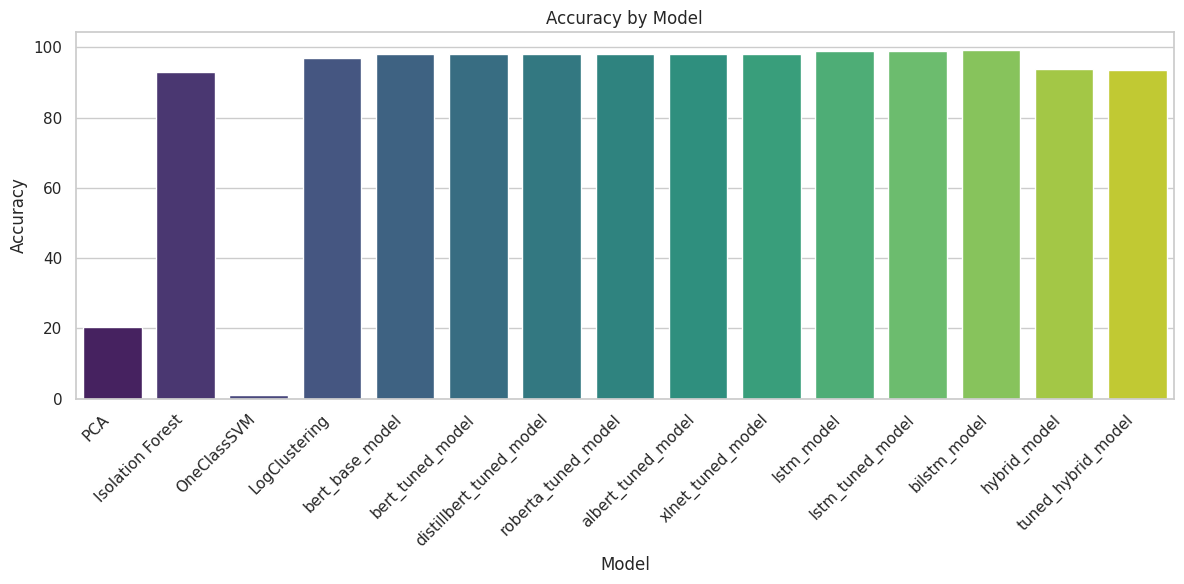

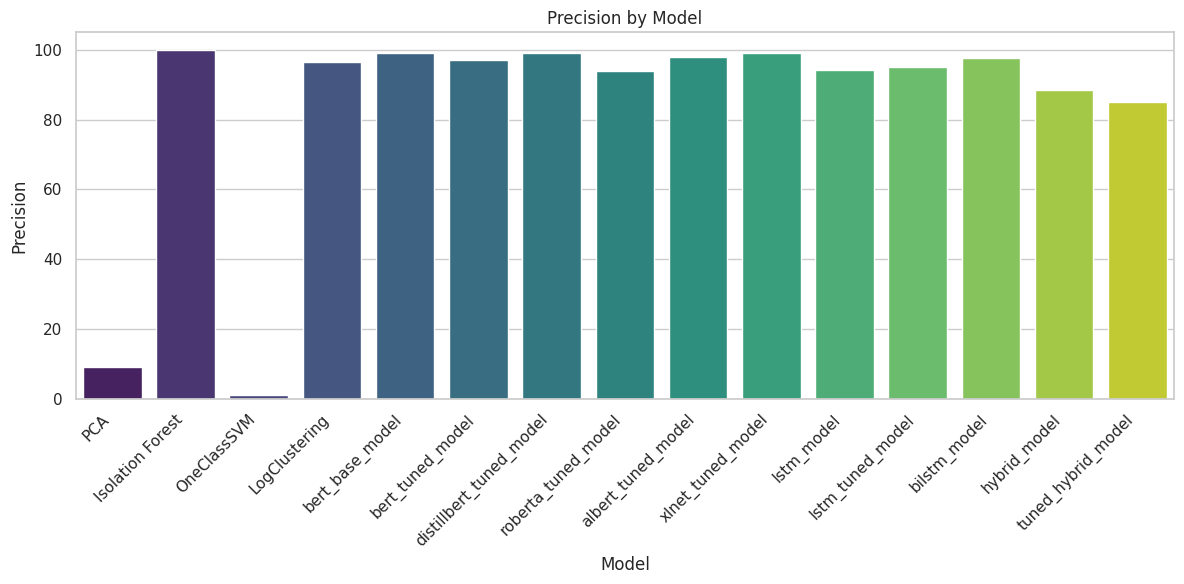

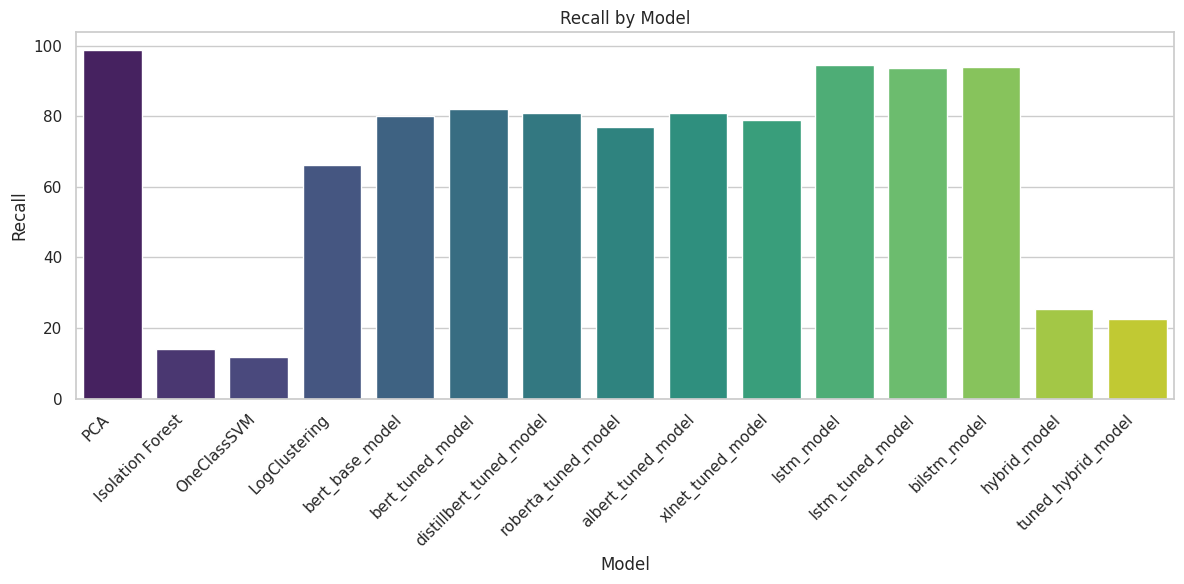

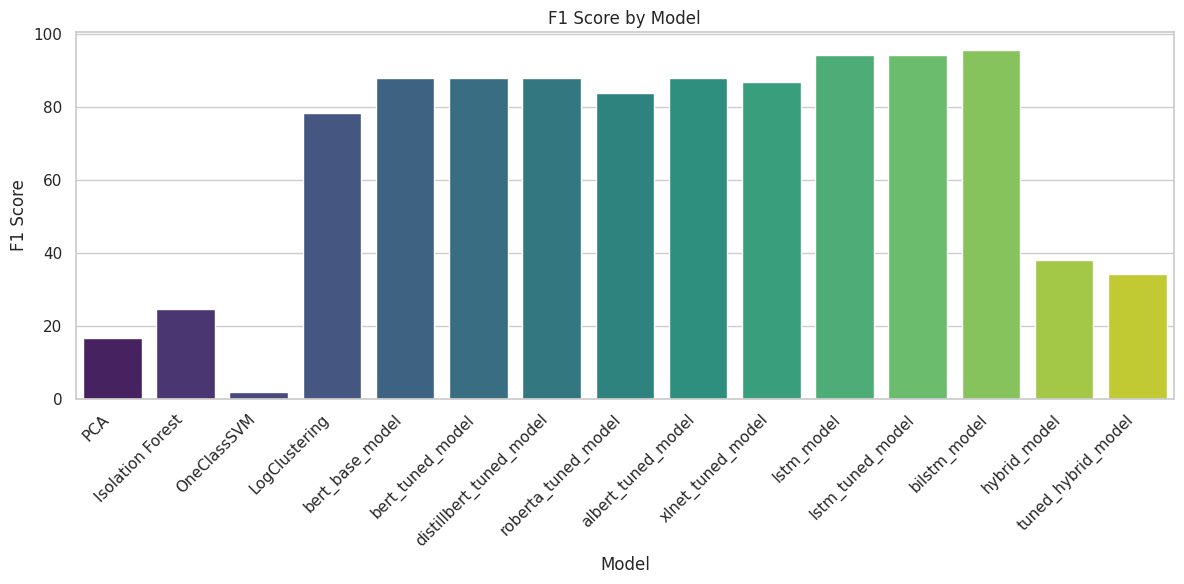

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create bar plots
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis")
    plt.title(f"{metric} by Model")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [ ]:
# Evaluation Criteria and Visualization

#LSTM

# Load the model from the pickle file
path_to_model_pickle = 'lstm_model.pkl'
with open(path_to_model_pickle, 'rb') as pickle_file:
    lstm_model = pickle.load(pickle_file)

In [ ]:
# LSTM Model
# Convert test data to PyTorch tensors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

Confusion Matrix:
[[13647    72]
 [   67  1141]]


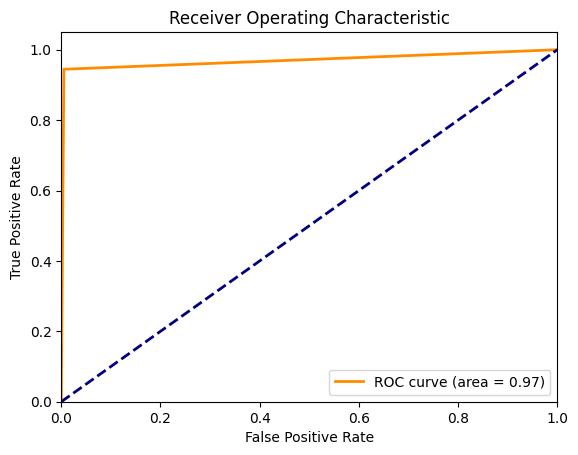

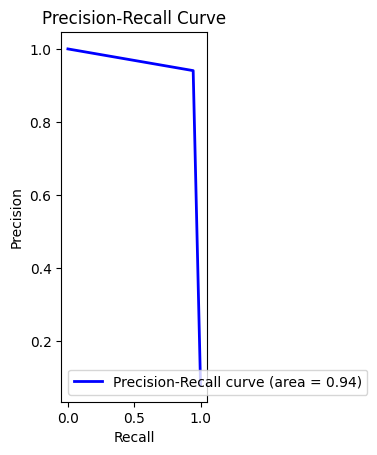

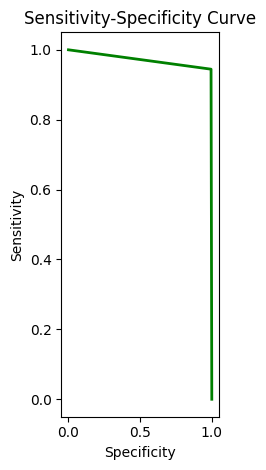

In [ ]:
# LSTM Model
# Convert test data to PyTorch tensors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


batch_size = 32
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to('cuda')
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to('cuda')

test_dataset = TensorDataset(x_test_tensor.unsqueeze(1), y_test_tensor)  # Add an extra dimension
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# #Evaluation
# accuracy, precision, recall, f1 = evaluate(lstm_model, test_loader)

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = lstm_model(inputs)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Create a confusion matrix
cm = confusion_matrix(y_true, np.round(y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_true, y_pred)
pr_auc = auc(recall, precision)

# Calculate Sensitivity-Specificity curve
sensitivity = tpr
specificity = 1 - fpr

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.subplot(132)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Plot Sensitivity-Specificity curve
plt.subplot(133)
plt.plot(specificity, sensitivity, color='green', lw=2)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Sensitivity-Specificity Curve')

plt.tight_layout()
plt.show()

Confusion Matrix:
[[13657    62]
 [   76  1132]]


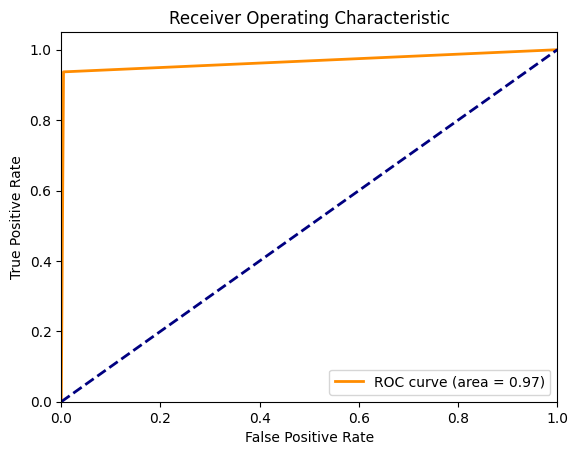

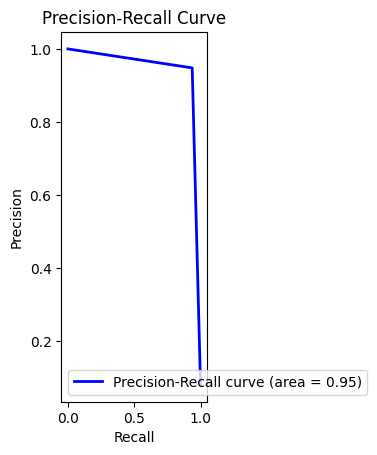

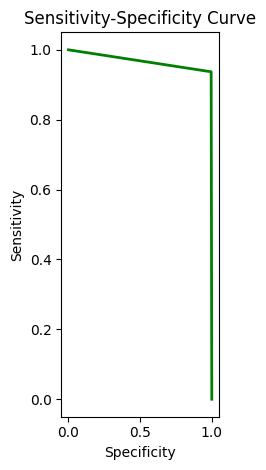

In [ ]:
# TunedLSTM Model

#LSTM

# Load the model from the pickle file
path_to_model_pickle = 'lstm_tuned_model.pkl'
with open(path_to_model_pickle, 'rb') as pickle_file:
    lstm_tuned_model = pickle.load(pickle_file)

# Convert test data to PyTorch tensors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

batch_size = 32

# Convert test data to PyTorch tensors
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to('cuda')
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to('cuda')

test_dataset = TensorDataset(x_test_tensor.unsqueeze(1), y_test_tensor)  # Add an extra dimension
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = lstm_tuned_model(inputs)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Create a confusion matrix
cm = confusion_matrix(y_true, np.round(y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_true, y_pred)
pr_auc = auc(recall, precision)

# Calculate Sensitivity-Specificity curve
sensitivity = tpr
specificity = 1 - fpr

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall curve
plt.subplot(132)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Plot Sensitivity-Specificity curve
plt.subplot(133)
plt.plot(specificity, sensitivity, color='green', lw=2)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Sensitivity-Specificity Curve')

plt.tight_layout()
plt.show()

Confusion Matrix:
[[13685    34]
 [   75  1133]]


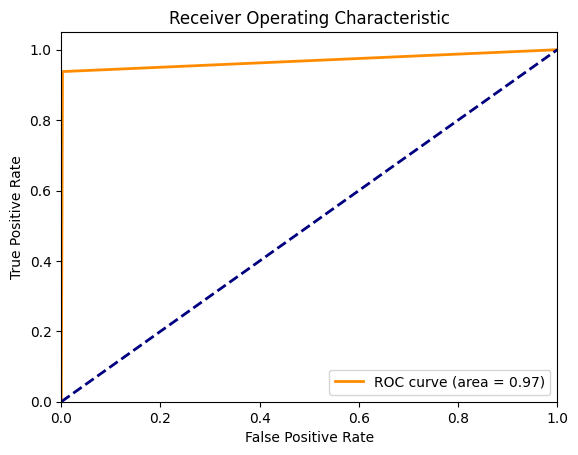

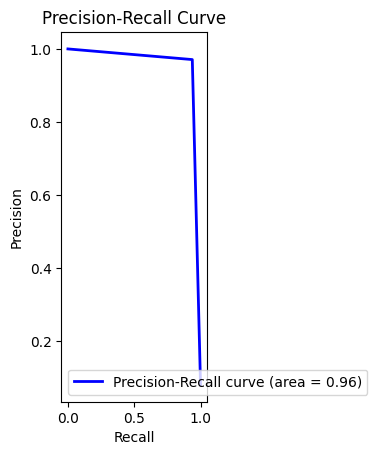

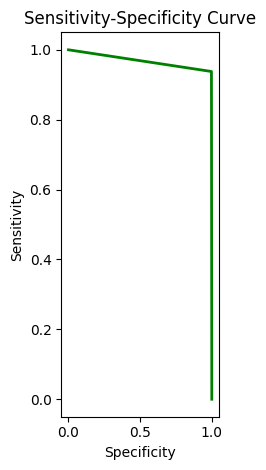

In [ ]:
# BiLSTM Model

#LSTM

# Load the model from the pickle file
path_to_model_pickle = 'bilstm_model.pkl'
with open(path_to_model_pickle, 'rb') as pickle_file:
    bilstm_model = pickle.load(pickle_file)

# Convert test data to PyTorch tensors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

batch_size = 32

# Convert test data to PyTorch tensors
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to('cuda')
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to('cuda')

test_dataset = TensorDataset(x_test_tensor.unsqueeze(1), y_test_tensor)  # Add an extra dimension
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = bilstm_model(inputs)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Create a confusion matrix
cm = confusion_matrix(y_true, np.round(y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_true, y_pred)
pr_auc = auc(recall, precision)

# Calculate Sensitivity-Specificity curve
sensitivity = tpr
specificity = 1 - fpr

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall curve
plt.subplot(132)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Plot Sensitivity-Specificity curve
plt.subplot(133)
plt.plot(specificity, sensitivity, color='green', lw=2)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Sensitivity-Specificity Curve')

plt.tight_layout()
plt.show()

In [ ]:
gc.collect()

torch.cuda.empty_cache()